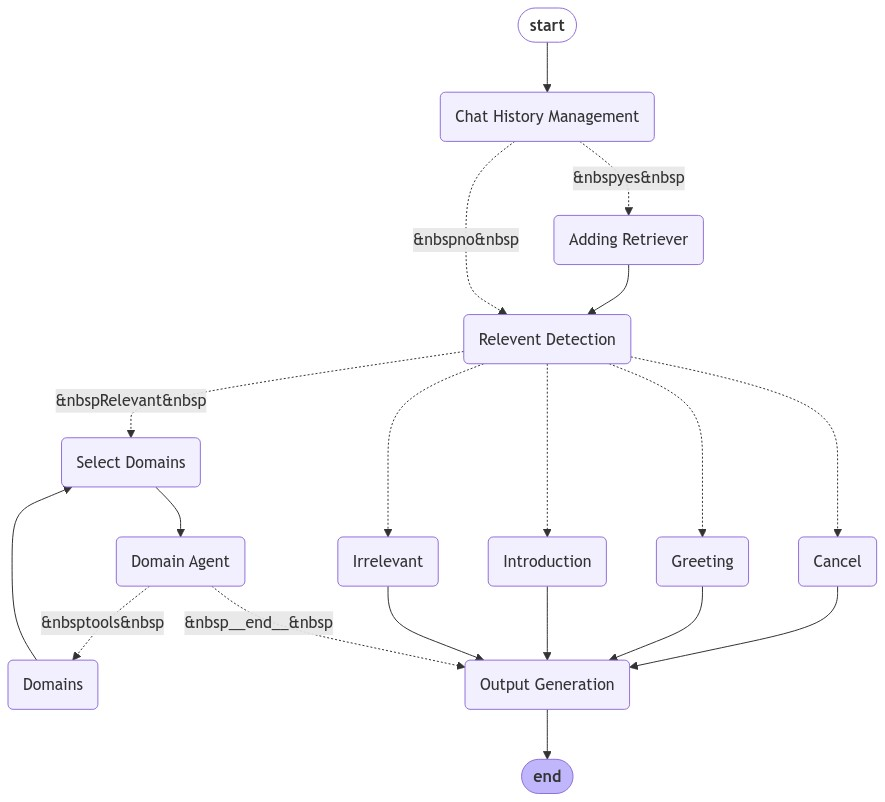

In [4]:
import time
from main import Main
from IPython.display import Image, display


sample_prompts_relevance = {
    
    "Greeting": 
    [
        "Hello!",
        "How are you?",
        "How's everything?",
        "Hi!",
    ],


    "Introduction": 
    [
        "Who are you?",
        "How can you help me?",
        "What can you do?",
    ],


    "Irrelevant": 
    [
    "How is the weather today?",
    "Tell me about the rules of the basketball.",
    "How to make a bread?",
    ],


    "Cancel":
    [
        "I don't want to continue with odering this anymore!",
    ],


    "Relevant": 
    [
        "Fine an apartment for rent.",
        "How much rent should I pay in avarage to live in tehran?",
        "I want to order a pizza.",
        "I have a stomachache. I need to see a doctor.",
        "Buy me a train ticket.",
    ]
}


user = Main(user_id=1, chat_session=1)
# display(Image(user.graph.get_graph().draw_mermaid_png()))

for subject in sample_prompts_relevance:
    print(f"\nSubject:  {subject}")
    prompts = sample_prompts_relevance[subject]
    num_correct = 0
    for prompt in prompts:
        start = time.time()
        results = user.run(user_prompt=prompt)
        end = time.time()
        answer = results[-1]["Output Generation"]["output_json"]
        if answer["domain"] == subject:
            num_correct += 1
        print(f"Prompt: {prompt}\nAnswer: {answer}    /    Inference: {round(end-start, 2)}")
        time.sleep(1)
    print(f"The result of the test of subject {subject}:  {num_correct}/{len(prompts)}")

# Testing Tool Calling

In [2]:
from langchain_core.pydantic_v1 import BaseModel, Field


class add(BaseModel):
    """Add two integers."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")


class multiply(BaseModel):
    """Multiply two integers."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")

In [1]:
from typing_extensions import Annotated, TypedDict
from langchain_core.pydantic_v1 import BaseModel, Field


class add(TypedDict):
    """Add two integers."""

    # Annotations must have the type and can optionally include a default value and description (in that order).
    a: Annotated[int, ..., "First integer"]
    b: Annotated[int, ..., "Second integer"]


class multiply(BaseModel):
    """Multiply two integers."""

    a: Annotated[int, ..., "First integer"]
    b: Annotated[int, ..., "Second integer"]


tools = [add, multiply]

In [4]:
import os

os.environ["GROQ_API_KEY"] = "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"

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")

llm_with_tools = llm.bind_tools(tools)

query = "What is 3 * 12?"

llm_with_tools.invoke(query)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4c3j', 'function': {'arguments': '{"a":3,"b":12}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 1048, 'total_tokens': 1127, 'completion_time': 0.065833333, 'prompt_time': 0.140839057, 'queue_time': 0.0021807230000000233, 'total_time': 0.20667239}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0d07bf63-200f-45e4-a7a2-8a56dab8d10d-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_4c3j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1048, 'output_tokens': 79, 'total_tokens': 1127})

In [ ]:
query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls

In [ ]:
# Import things that are needed generically
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool, StructuredTool, tool
from typing import Optional, Type

from langchain.callbacks.manager import (
    AsyncCallbackManagerForToolRun,
    CallbackManagerForToolRun,
)


class SearchInput(BaseModel):
    query: str = Field(description="should be a search query")


class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")


class CustomSearchTool(BaseTool):
    name = "custom_search"
    description = "useful for when you need to answer questions about current events"
    args_schema: Type[BaseModel] = SearchInput

    def _run(
        self, query: str, run_manager: Optional[CallbackManagerForToolRun] = None
    ) -> str:
        """Use the tool."""
        return "LangChain"

    async def _arun(
        self, query: str, run_manager: Optional[AsyncCallbackManagerForToolRun] = None
    ) -> str:
        """Use the tool asynchronously."""
        raise NotImplementedError("custom_search does not support async")


class CustomCalculatorTool(BaseTool):
    name = "Calculator"
    description = "useful for when you need to answer questions about math"
    args_schema: Type[BaseModel] = CalculatorInput
    return_direct: bool = True

    def _run(
        self, a: int, b: int, run_manager: Optional[CallbackManagerForToolRun] = None
    ) -> str:
        """Use the tool."""
        return a * b

    async def _arun(
        self,
        a: int,
        b: int,
        run_manager: Optional[AsyncCallbackManagerForToolRun] = None,
    ) -> str:
        """Use the tool asynchronously."""
        raise NotImplementedError("Calculator does not support async")


search = CustomSearchTool()
print(search.name)
print(search.description)
print(search.args)

multiply = CustomCalculatorTool()
print(multiply.name)
print(multiply.description)
print(multiply.args)
print(multiply.return_direct)